# UVA Data Science Puzzler Solution

By: Grant Hanley

Submitted: January 24th, 2023

<img src="UVA_DS_Puzzle.png" width="600"/>

**Problem:** A small number of cards has been found from a complete pack. If I deal among four people, three cards remain. If I deal among three people, two remain and if I deal among five people, two cards remain. How many cards are there?

**Approach:** Recognizing this a remainder or modulus problem, there is certainly a linear algebra method here, but these days applied methods are pretty fast and inline with the spirit of Data Science.
 - Use a for loop and conditionals to iterate and identify 
 - Store iterations inputs, modulus', and conditional result in a dataframe for scalability and potential visualization
 - Attempt to visualize the results with matplotlib and seaborn

 **Answer:** The answer is **47**.

In [73]:
# Slick Answer by list comprehension 
# %timeit == 8.81 µs ± 3.05 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
[i for i in range(1, 53) if (i % 3 == 2) and (i % 5 == 2) and (i % 4 == 3)]

[47]

After importing the required packages, initialize a dataframe for the for loop, define the modulus conditions, and during each loop store the information into a dataframe, print out the input number if the result if the condition is met.

Using the dataframe, I attempted to visualize the result with a true false number line, looking for where all three modulus' are true. 

In [56]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# initialize dataframe
df = pd.DataFrame()

# write a for loop that tests the numbers 1-52 and prints the numbers
for i in range(1,53):
    if (i % 3 == 2) and (i % 5 == 2) and (i % 4 == 3):
        condition = True
        print(i)
    else: 
        condition = False

    #store i in the dataframe
    df = pd.concat([df, pd.DataFrame({'input': i, 
                                    'mod3': i % 3,
                                    'mod5': i % 5,
                                    'mod4': i % 4,
                                    'condition': condition}, index=[0])], ignore_index=True)

47


In [58]:
# Show the work in a dataframe
# show max rows
pd.set_option('display.max_rows', 100)

# show dataframe with all columns
df.head(52)

,input,mod3,mod5,mod4,condition
0,1,1,1,1,False
1,2,2,2,2,False
2,3,0,3,3,False
3,4,1,4,0,False
4,5,2,0,1,False
5,6,0,1,2,False
6,7,1,2,3,False
7,8,2,3,0,False
8,9,0,4,1,False
9,10,1,0,2,False


In [59]:
# filter to only rows where conditions is True
df[df['condition'] == True].min()

input          47
mod3            2
mod5            2
mod4            3
condition    True
dtype: object

The lowest value where all conditions are true is 47. Outside the scope of the original problem, and only mildly interesting: after 47, every next sixty is also true (107, 167, 227 ). Makes sense that this would be because, 3*4*5 = 60.

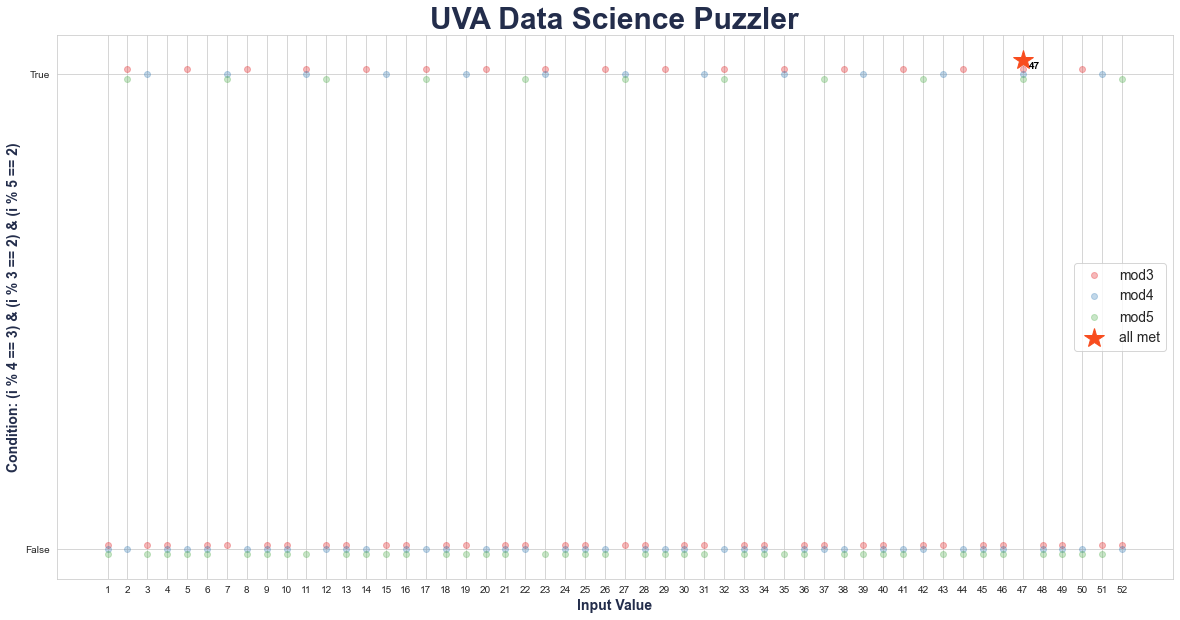

In [65]:
# Visualization Attempt 2
# make a number line

# set the style
sns.set_style('whitegrid')

# set the color palette
sns.set_palette('Set1')

# set the size
plt.figure(figsize=(20,10))

# plot the data as points, with transparency, jitter
plt.plot(df['input'], (df['mod3']==2)+.01, 'o', alpha=0.3, label='mod3')
plt.plot(df['input'], df['mod4']==3, 'o', alpha=0.3, label='mod4')
plt.plot(df['input'], (df['mod5']==2)-.01, 'o', alpha=0.3, label='mod5')

# plot a star at he point where condition is True
plt.plot(df[df['condition'] == True]['input'], 1.03, '*', markersize=20, label='condition', color = '#F84C1E')

# add labels to the point, if true, then label the point
for i in range(1,52):
    if df['condition'][i] == True:
        plt.text(df['input'][i]+.6, df['condition'][i]+.01, df['input'][i], horizontalalignment='center', size='medium', color='black', weight='semibold')

# add a legend, change condition to all
plt.legend(['mod3', 'mod4', 'mod5', 'all met'], fontsize=14)

# add a title
plt.title('UVA Data Science Puzzler', fontsize=30, color='#232D4B', fontweight='bold')

# set the x and y labels
plt.xlabel('Input Value', fontsize=14, fontweight='bold',color='#232D4B')
plt.ylabel('Condition: (i % 4 == 3) & (i % 3 == 2) & (i % 5 == 2)', fontsize=14, fontweight='bold', color='#232D4B')

# set the y ticks to only hae 0 and 1
plt.yticks([0,1])

# include all x ticks integers
plt.xticks(range(1,53))

# change tick labels to true and false
plt.yticks([0,1], ['False', 'True'])

# show the plot
plt.show()
